# In-Class Project: SEA LEVEL TRENDS 🌊

# 🌊 Tidal Prophecy: LSTM Sea Level Forecasting

**The Coastal Guardian Institute** is facing an urgent challenge! Rising sea levels threaten coastal communities worldwide, and they need our help to build an **intelligent early warning system** that can ***predict future sea level changes*** using historical oceanographic data. Time is of the tide! 🏄‍♀️

Our mission: Create a Long Short-Term Memory (LSTM) neural network that can learn from decades of tidal patterns and climate data to forecast sea level trends and help protect vulnerable coastlines.

<br>

This notebook will navigate through:

- The Time Series ML Pipeline
  - 🟦 **Data Collection & Import**
  - 🟧 **Data Preprocessing**
  - 🟩 **Model Building**
  - 🟥 **Training**
  - 🟪 **Testing & Visualization**

---

<br>

**Navigator's Guide to completing this expedition:**

> ***Sections with bold and italics are mission-critical instructions you should follow to code***. When the waters get murky, follow the bold and italics like a lighthouse! 🗼

> Ocean codes (🟦🟧🟩🟥🟪) show your current position in the temporal ML voyage

> Sections marked with (⌛) may require patience as the neural networks learn the ocean's ancient patterns

> Sections with (🌊) contain advanced time series techniques that will make your predictions flow like water

> Use the expedition log (📋) on the left of your Colab workspace to track your progress through uncharted waters

Remember: Every great oceanographer started with a single wave prediction!

**Dive in and let's turn data into prophecy!** 🔮🌊

Start by opening the "LSTM Tide Predictor" block and begin your journey into the depths of temporal intelligence!

---

**"The sea, once it casts its spell, holds one in its net of wonder forever... and now we'll predict its every move!" - Adapted from Jacques Cousteau**

## Before you start -❗Change Runtime Type to T4 GPU ❗

# 🟦 Imports

We need to import the libraries for our time series LSTM implementation:

>**Import `pandas as pd`** for data manipulation and handling time series data.

>**Import `os`** for file operations and **`numpy as np`** for numerical computations.

>**Import `datetime`** for parsing and manipulating time-based data.

>**Import `matplotlib.pyplot as plt`** for plotting sea level trends and model predictions.

>**Import `kagglehub`** to access sea level datasets from Kaggle.

>**Import `MinMaxScaler` from `sklearn.preprocessing`** to normalize data for LSTM training.

>**Import `torch`** as the core deep learning framework and **`torch.nn as nn`** for neural network layers.

>**Import `torch.optim as optim`** for optimizers and **`torch.utils.data as data`** for data loading.

**Go ahead and import `pandas as pd`, `numpy as np`, and `torch`** to make the code below work. Run with the play button [>]


In [ ]:
# CODE HERE # The pandas Library is a important tool for data manipulation, handling and visualization
import os
# CODE HERE
import matplotlib.pyplot as plt # For plotting RNN/LSTM output
from datetime import datetime # more data handling and translation

import kagglehub

from sklearn.preprocessing import MinMaxScaler # scales data for model training

# CODE HERE
import numpy as np
import pandas as pd
import torch.nn as nn
import torch # Import torch here

import numpy as np
import torch.optim as optim
import torch.utils.data as data

## 🟧 Load Dataset & Pre-Processing

In [ ]:
!pip install kaggle
# here we are importing kaggle so we can use it to access the data


Now we'll download our oceanographic treasure trove from Kaggle:

>**Use `kagglehub.dataset_download()`** to download the Charleston sea level dataset. **Set `path`** equal to the download result to store the file location.

>The dataset identifier is **`"kevinwibowo/charleston-sea-level-daily-dataset-1921-2014"`** - this contains nearly a century of daily sea level measurements from Charleston.

>This dataset includes the following columns:
>- **`time`** - timestamp of measurement
>- **`depth`** - water depth measurement  
>- **`latitude`** - geographic latitude coordinate
>- **`longitude`** - geographic longitude coordinate
>- **`sea surface height above ref level`** - the key measurement for our predictions
>- **`sensor type code`** - type of measuring instrument used

>**Print the `path`** to see where files are stored, then **use `os.listdir(path)`** to see what files were downloaded.

**Download the dataset and explore the file structure** by running the code below:

In [ ]:
# Download latest version
path = kagglehub.dataset_download("kevinwibowo/charleston-sea-level-daily-dataset-1921-2014") # Sea levels dataset

# This dataset consists of:
    # - time
    # - depth
    # latitude
    # longitude
    # sea surface height above ref level
    # sensor type code

# CODE HERE
print(path)
print(os.listdir(path))


/kaggle/input/charleston-sea-level-daily-dataset-1921-2014
['daily Charleston 1921-2014.csv']


Create a direct path to our CSV file:

>**Use `os.path.join()`** to combine the dataset path with the CSV filename **`'daily Charleston 1921-2014.csv'`**. **Store this in `csv_file_path`**.

>**Print the `csv_file_path`** to confirm we're accessing the correct file.

**Set up the file path and verify it's correct:**

In [ ]:
# Stores file path into a usable variable
csv_file_path = os.path.join(path, 'daily Charleston 1921-2014.csv')

# This confirms that the file we are accessing is the correct file
print("CSV file path:", csv_file_path)

CSV file path: /kaggle/input/charleston-sea-level-daily-dataset-1921-2014/daily Charleston 1921-2014.csv


Load the sea level data into a pandas DataFrame:

>**Use `pd.read_csv()`** with the `csv_file_path` to read the data. **Include `skiprows=[1]`** to skip the second row which contains units/metadata rather than actual data.

>**Store the result in `df`** (our main DataFrame for analysis).

**Load the CSV data and prepare it for processing:**

In [ ]:
# Read the CSV file
df = pd.read_csv(csv_file_path, skiprows=[1])
# CODE HERE


Visualize the Pandas DataFrame - look at its columns (using `df.columns`) and the first 5 rows (using `df.head()`)

In [ ]:
# CODE HERE
df.columns
df.head()

,time,depth,latitude,longitude,sea_surface_height_above_reference_level,sensor_type_code
0,1921-01-01T12:00:00Z,0.0,32.782,-79.925,NaN,NaN
1,1921-01-02T12:00:00Z,0.0,32.782,-79.925,NaN,NaN
2,1921-01-03T12:00:00Z,0.0,32.782,-79.925,NaN,NaN
3,1921-01-04T12:00:00Z,0.0,32.782,-79.925,NaN,NaN
4,1921-01-05T12:00:00Z,0.0,32.782,-79.925,NaN,NaN


In [ ]:
# CODE HERE

Clean and prepare the dataset for LSTM training:

>**Convert the `time` column** to datetime format using `pd.to_datetime()` with **`errors='coerce'`** to handle any invalid dates gracefully.

>**Drop the `latitude` and `longitude` columns** using `df.drop()` since we don't need location data for time series prediction.

>**Remove rows with missing sea level data** using `df.dropna()` on the **`'sea_surface_height_above_reference_level'`** column. **Store the cleaned data in `df_clean`**.

**Clean the dataset and prepare it for time series modeling:**

In [ ]:
# Cleaning the dataset
# CODE HERE
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.drop(columns=['latitude', 'longitude'])
df_clean = df.dropna(subset=['sea_surface_height_above_reference_level'])

Now print the first ten rows of the cleaned dataframe by passing the `head(10)` attribute

In [ ]:
# CODE HERE
df_clean.head(10)

,time,depth,sea_surface_height_above_reference_level,sensor_type_code
274,1921-10-02 12:00:00+00:00,0.0,1785.0,1.0
275,1921-10-03 12:00:00+00:00,0.0,1729.0,1.0
276,1921-10-04 12:00:00+00:00,0.0,1599.0,1.0
277,1921-10-05 12:00:00+00:00,0.0,1634.0,1.0
278,1921-10-06 12:00:00+00:00,0.0,1644.0,1.0
279,1921-10-07 12:00:00+00:00,0.0,1633.0,1.0
280,1921-10-08 12:00:00+00:00,0.0,1500.0,1.0
281,1921-10-09 12:00:00+00:00,0.0,1514.0,1.0
282,1921-10-10 12:00:00+00:00,0.0,1581.0,1.0
283,1921-10-11 12:00:00+00:00,0.0,1557.0,1.0


### Visualizing the Data

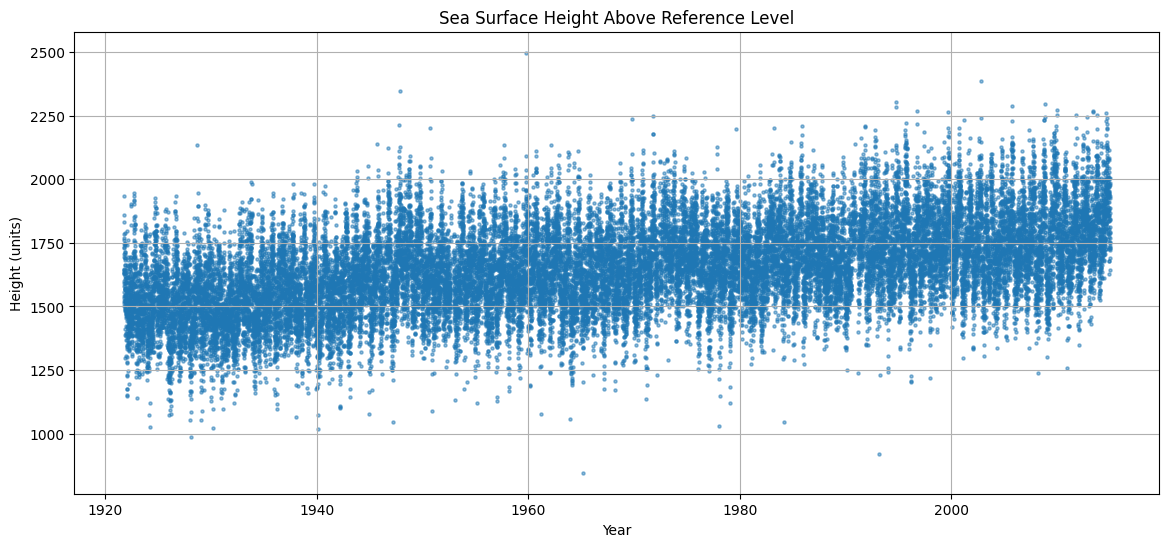

In [ ]:

# Visualizing the data
  # create a figure
plt.figure(figsize=(14, 6))
  # create establish figure type
plt.scatter(df_clean['time'], df_clean['sea_surface_height_above_reference_level'], s=5, alpha=0.5)

  # create axes and figure parts.
plt.title("Sea Surface Height Above Reference Level")
plt.xlabel("Year")
plt.ylabel("Height (units)")
plt.grid(True)
plt.show()


In [ ]:

# clipping data so we can use it.
df_post_1980 = df_clean[df_clean['time'] >= pd.Timestamp("2010-01-01", tz="UTC")].copy()

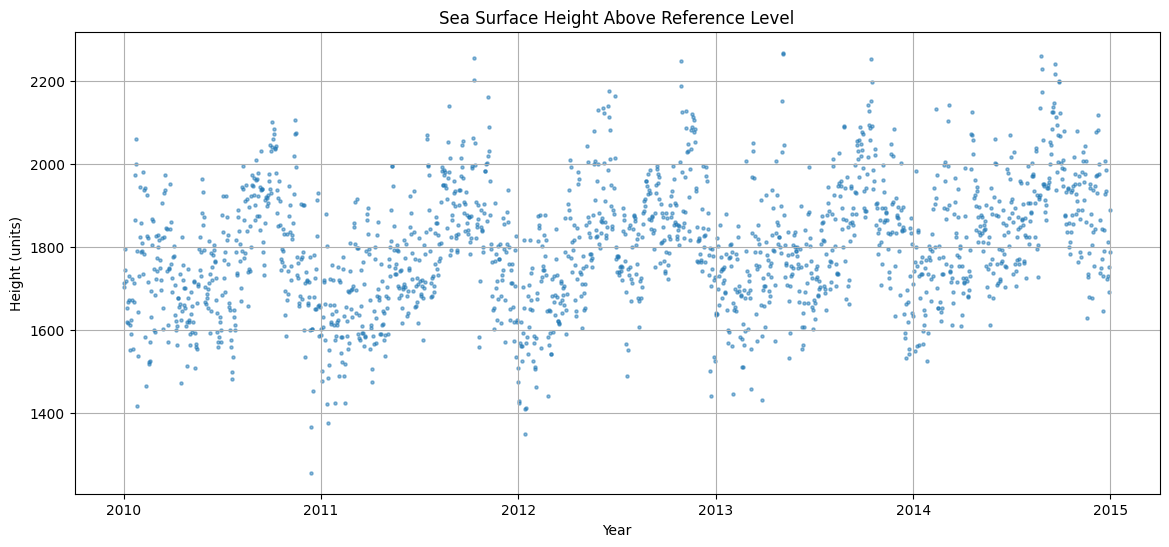

In [ ]:

# plotting new and clipped data
plt.figure(figsize=(14, 6))
plt.scatter(df_post_1980['time'], df_post_1980['sea_surface_height_above_reference_level'], s=5, alpha=0.5)
plt.title("Sea Surface Height Above Reference Level")
plt.xlabel("Year")
plt.ylabel("Height (units)")
plt.grid(True)
plt.show()


### 🔀 Split into training (67%) and test (33%) sets


Prepare the data for LSTM training:

>**Extract the target variable** `sea_surface_height_above_reference_level` from `df_post_1980` and store in `dataset`.

>**Initialize `MinMaxScaler()`** to normalize values between 0 and 1, which helps LSTM training stability.

>**Scale the data** using `scaler.fit_transform()`. **Use `.values.reshape(-1, 1)`** to convert to proper array format, then **`.flatten()`** to return to 1D. Store in `scaled`.

>**Split the data** with 70% for training: **set `train_size`** to `int(len(scaled) * 0.7)`, then **create `train` and `test`** arrays using array slicing.

>**Print the lengths** of train and test sets to verify the split.

**Scale and split the data for time series training:**

In [ ]:
print(len(df_post_1980))

1826


In [ ]:
# CODE HERE
dataset = df_post_1980['sea_surface_height_above_reference_level'].values
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dataset.reshape(-1, 1)).flatten()
train_size = int(len(scaled) * 0.7)
train, test = scaled[:train_size], scaled[train_size:]
print(len(train), len(test))


1278 548


### 🔁 Create sequences of 'lookback' length from raw series
This helps the LSTM learn temporal dependencies

This function transforms our single time series into supervised learning data by creating sliding windows of past observations to predict future values. Each input sequence contains `lookback` historical sea level measurements, with the corresponding target being the next measurement in the sequence.


Create a function to generate LSTM input sequences:

>**Define `create_dataset(dataset, lookback)`** that takes the scaled data and sequence length parameter.

>**Initialize empty lists `X` and `y`** to store input sequences and target values.

>**Loop through the dataset** with `range(len(dataset) - lookback)` to avoid going past the end.

>**Extract features** using `dataset[i:i+lookback]` - this creates a sequence of past values to learn from.

>**Extract target** using `dataset[i+lookback:i+lookback+1]` - this is the next value to predict.

>**Append feature and target** to their respective lists for each iteration.

>**Convert to NumPy arrays** then **convert to PyTorch tensors** with `torch.tensor()` and `dtype=torch.float32`.

>**Return the feature and target tensors** for LSTM training.

**Create the sequence generation function for time series windows:**

In [ ]:
def create_dataset(dataset, lookback):
    X, y = [], []  # Initialize empty lists to store inputs (X) and outputs (y)

    # Iterate through the dataset, stopping `lookback` steps before the end
    for i in range(len(dataset) - lookback):
        # CODE HERE
        features = dataset[i:i+lookback]
        target = dataset[i+lookback:i+lookback+1]
        X.append(features)
        y.append(target)

    # Convert to NumPy arrays and PyTorch tensors
    X, y = np.array(X), np.array(y)
    X, y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

    return X, y

    # CODE HERE


Create the input sequences for LSTM training:

>**Set `lookback = 6`** - this means each input sequence contains 6 historical sea level measurements to predict the next single value.

>**Generate training data** by calling `create_dataset(train, lookback=lookback)` and storing results in **`X_train, y_train`**.

>**Generate test data** by calling `create_dataset(test, lookback=lookback)` and storing results in **`X_test, y_test`**.

**Create the supervised learning datasets with 6-step lookback windows:**

In [ ]:
# CODE HERE
lookback = 6
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

Print the data type of `X_train` (think: what attribute do we use?)

In [ ]:
# CODE HERE
print(X_train.dtype)

torch.float32


Verify the sequence creation worked correctly:

>**Set `sequence_num = 10`** to examine a specific training example.

>**Print `X_train[sequence_num]`** to see the 6 input values for that sequence.

>**Print `y_train[sequence_num]`** to see the corresponding target value.

>**Print the shapes** of `X_train, y_train` and `X_test, y_test` to verify dimensions are correct for LSTM input.

**Inspect the data structure and verify sequence creation:**

In [ ]:
# CODE HERE
sequence_num = 10
print(X_train[sequence_num])
print(y_train[sequence_num])
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

tensor([0.4101, 0.2915, 0.3518, 0.3636, 0.3310, 0.4111])
tensor([0.4605])
torch.Size([1272, 6]) torch.Size([1272, 1])
torch.Size([542, 6]) torch.Size([542, 1])


In [ ]:
# CODE HERE

## 🟩 Model Building
- 2 stacked LSTM layers
- Followed by two Linear layers for final prediction


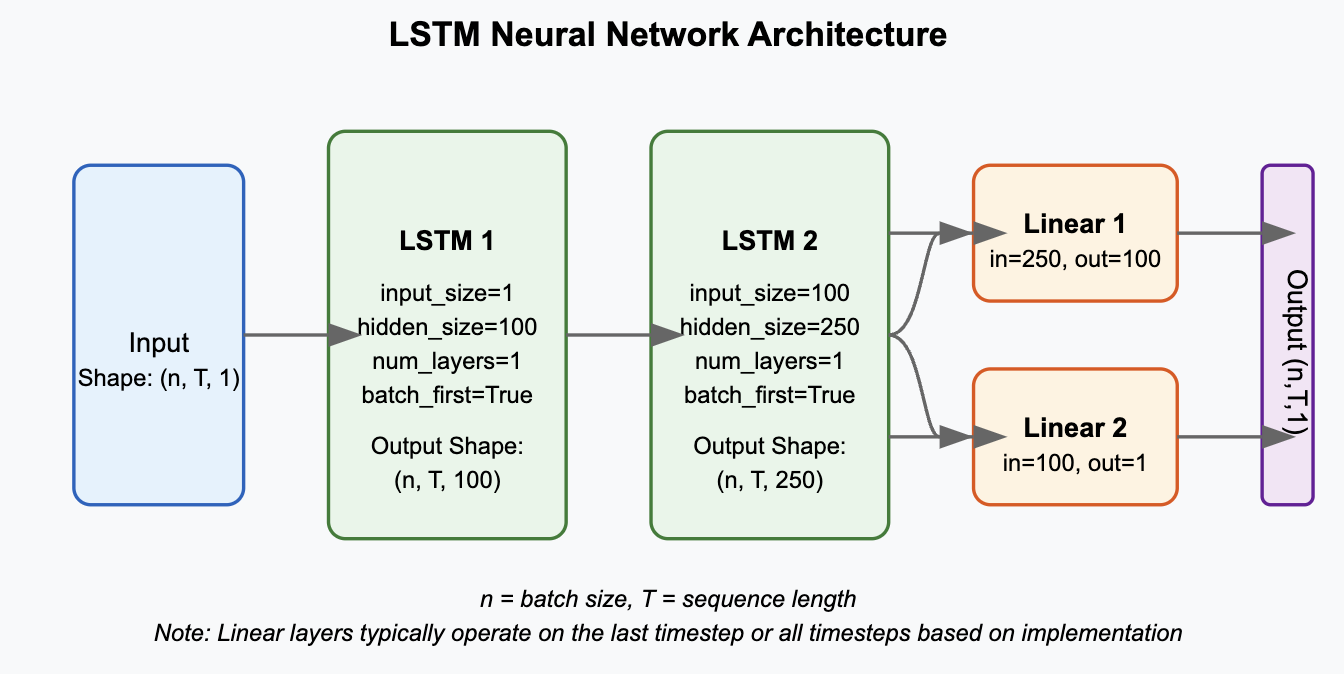

**Note**: We're using a custom class instead of Sequential API because LSTMs return tuples (output, hidden_states) and need timestep extraction, making Sequential awkward for RNN architectures.

Define the LSTM model class:

>**Create class `LSTM(nn.Module)`** and initialize with `super().__init__()`.

>**Define `self.lstm1`** as the first LSTM layer with **`input_size=1`** (single feature), **`hidden_size=100`**, and **`batch_first=True`**.

>**Define `self.lstm2`** as the second LSTM layer with **`input_size=100`**, **`hidden_size=250`** for increased capacity.

>**Add `self.linear1`** as a dense layer reducing from **250 to 100** neurons.

>**Add `self.linear2`** as the output layer reducing from **100 to 1** (single prediction).

>**Define `forward(self, x)`** method:
>- Pass through both LSTM layers, ignoring hidden states with `_`
>- Extract last timestep with **`x[:, -1, :]`**
>- Pass through both linear layers
>- Return final prediction

**Build the LSTM model architecture:**

In [ ]:
# LSTM class initialize
class LSTM(nn.Module):
    def __init__(self):
        # CODE HERE
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=1, hidden_size=100, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=100, hidden_size=250)
        self.linear1 = nn.Linear(250, 100)
        self.linear2 = nn.Linear(100, 1)

    def forward(self, x):
        # CODE HERE
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = self.linear1(x[:, -1, :])
        x = self.linear2(x)

        return x


## 🧺 Create DataLoader for mini-batch training

Initialize the model and select compute device:

>**Set `device`** to use GPU if available with `torch.device("cuda" if torch.cuda.is_available() else "cpu")`. **Print device** to confirm.

>**Create the model** with `LSTM().to(device)` to move it to the selected device. **Print the model** to see the architecture summary.

**Initialize and configure the LSTM model:**

In [ ]:
# CODE HERE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTM().to(device)
print(model)

LSTM(
  (lstm1): LSTM(1, 100, batch_first=True)
  (lstm2): LSTM(100, 250)
  (linear1): Linear(in_features=250, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)


Configure the training components:

>**Create `optimizer`** using `optim.Adam()` with model parameters and **learning rate `lr=0.001`**.

>**Set `loss_fn`** to `nn.MSELoss()` for regression - measuring prediction accuracy.

>**Create `loader`** using `data.DataLoader()` with `TensorDataset(X_train, y_train)`, **`shuffle=True`**, and **`batch_size=32`**.

**Set up optimizer, loss function, and data loader:**

In [ ]:
# CODE HERE
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=32)

## 🟥 Train model over multiple epochs & 🟪 Testing


### Training + Testing Loop

Now we have everything ready to train+test our model (we're doing this together in one). **The Coastal Guardian Institute says we should:**

1. **Make a `trainer` function** with parameters: `model`, `optimizer`, `train_dataloader`, `X_train`, `y_train`, `X_test`, `y_test`, and `epochs`
2. **Create the main epoch loop** using `for epoch in range(epochs)`
3. **Put `model` into training mode** using the `.train()` method
4. **Loop through each batch** using `for X_batch, y_batch in train_dataloader`
5. **Move data to device and reshape**: Use `.to(device)` and `.unsqueeze(-1)` on `X_batch` to get `[batch, seq_len, 1]` shape, and move `y_batch` to device
   > Remember: LSTM needs the extra feature dimension, unlike regular neural networks
6. **Get predictions** by passing `X_batch` through the `model()`
7. **Calculate loss** using `loss_fn(y_pred, y_batch)`
8. **Perform backpropagation**: Use `optimizer.zero_grad()`, `loss.backward()`, and `optimizer.step()`
9. **Skip evaluation unless it's every 5th epoch** using `if epoch % 5 != 0: continue`
10. **Switch to evaluation mode** using `model.eval()` and wrap evaluation in `torch.no_grad()`
11. **Calculate train and test RMSE** using `torch.sqrt(loss_fn())` on both datasets with proper device placement and reshaping
12. **Print epoch results** using f-string showing both train and test RMSE every 5 epochs

**Key differences from before**: This function evaluates on test data, uses RMSE metrics for testing (instead of accuracy), prints loss/RMSE every 5 epochs, and requires tensor reshaping for LSTM input.

**Build the comprehensive training function:** loss** using `loss_fn(y_pred, y_batch)`.

>**Perform backpropagation**: **Use `optimizer.zero_grad()`**, **`loss.backward()`**, and **`optimizer.step()`**.

>**Evaluation every 5 epochs**: **Skip evaluation unless `epoch % 5 == 0`** using `continue`.

>**Switch to evaluation mode** using `model.eval()` and **wrap evaluation in `torch.no_grad()`**.

>**Calculate RMSE for both datasets**: Get train and test RMSE using **`torch.sqrt(loss_fn())`** on predictions vs actual values.

>**Print epoch results** showing both train and test RMSE every 5 epochs.

**Key differences from typical training loops**: This function includes test set evaluation, uses RMSE instead of raw loss, only prints every 5 epochs, and requires `.unsqueeze(-1)` for proper LSTM input formatting.

**Build the comprehensive training function:**

In [ ]:
def trainer(model, optimizer, train_dataloader, X_train, y_train, X_test, y_test, epochs):
    for epoch in range(epochs):
        model.train()

        for X_batch, y_batch in train_dataloader:
            # CODE HERE (train steps)
            X_batch, y_batch = X_batch.to(device).unsqueeze(-1), y_batch.to(device)
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # CODE HERE (if statement)
        if epoch % 5 != 0: continue

        model.eval()
        with torch.no_grad():
            # CODE HERE (testing steps)
            y_train_pred = model(X_train.to(device).unsqueeze(-1))
            y_test_pred = model(X_test.to(device).unsqueeze(-1))
            train_rmse = torch.sqrt(loss_fn(y_train_pred, y_train.to(device)))
            test_rmse = torch.sqrt(loss_fn(y_test_pred, y_test.to(device)))

        # CODE HERE (print metrics)
        print(f"Epoch {epoch}, Train RMSE: {train_rmse.item()}, Test RMSE: {test_rmse.item()}")

Run the function, try 25 epochs to start and if time try doing more

In [ ]:
# CODE HERE
trainer(model, optimizer, loader, X_train, y_train, X_test, y_test, 25)

Epoch 0, Train RMSE: 0.07387103885412216, Test RMSE: 0.07342178374528885
Epoch 5, Train RMSE: 0.07304050773382187, Test RMSE: 0.07255904376506805
Epoch 10, Train RMSE: 0.07903192192316055, Test RMSE: 0.08620509505271912
Epoch 15, Train RMSE: 0.07299746572971344, Test RMSE: 0.07119898498058319
Epoch 20, Train RMSE: 0.0826631486415863, Test RMSE: 0.07481807470321655


## 🟪 Make predictions for test sets & visualize them

Generate model predictions and prepare them for plotting:

>**Wrap everything in `torch.no_grad()`** to disable gradient computation during evaluation.

>**Get the full original series** from `df_post_1980["sea_surface_height_above_reference_level"].values` for reference.

>**Prepare inputs for prediction**: Add feature dimension with `.unsqueeze(-1)` and move to device for both `X_train` and `X_test`.

>**Generate train predictions**: Pass `X_train_input` through model, then **`.squeeze().detach().cpu().numpy()`** to convert to numpy array.

>**Generate test predictions**: Same process for `X_test_input`.

>**Inverse transform predictions**: Use `scaler.inverse_transform()` with **`.reshape(-1, 1).flatten()`** to convert back to original sea level scale.

>**Create plotting arrays**: Make `train_plot` and `test_plot` arrays **filled with `np.nan`** using `np.full_like(full_series, np.nan)`.

>**Align predictions with timeline**: Fill `train_plot` starting at `lookback` index, and `test_plot` starting after training data ends.

**Generate and align predictions for visualization:**

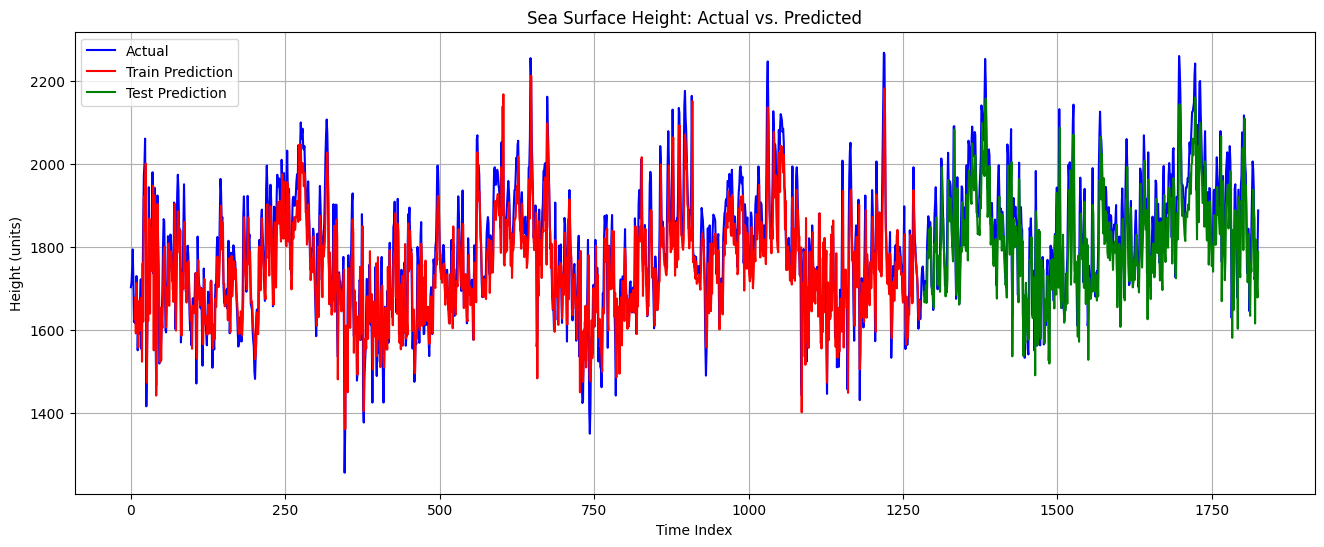

In [ ]:
with torch.no_grad():
    # CODE HERE
    full_series = df_post_1980["sea_surface_height_above_reference_level"].values
    X_train_input, X_test_input = X_train.to(device).unsqueeze(-1), X_test.to(device).unsqueeze(-1)
    train_pred = model(X_train_input).squeeze().detach().cpu().numpy()
    test_pred = model(X_test_input).squeeze().detach().cpu().numpy()
    train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1)).flatten()
    test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1)).flatten()
    train_plot = np.full_like(full_series, np.nan)
    test_plot = np.full_like(full_series, np.nan)
    train_plot[lookback:len(train_pred) + lookback] = train_pred
    test_plot[len(train) + lookback:] = test_pred

# Plot
plt.figure(figsize=(16, 6))
plt.plot(full_series, label='Actual', color='blue')
plt.plot(train_plot, label='Train Prediction', color='red')
plt.plot(test_plot, label='Test Prediction', color='green')
plt.title("Sea Surface Height: Actual vs. Predicted")
plt.xlabel("Time Index")
plt.ylabel("Height (units)")
plt.legend()
plt.grid(True)
plt.show()

# HW Project: Stock Market Prediction

Make a copy of this notebook: https://colab.research.google.com/drive/1BIQCe5rLfy2cHF_D0tOLb9DjydrTQGZI?usp=sharing